<center><h1>Investigate Environment and Economy across Countries with Energy Consumption Data</h1></center>
<center><h2>Project 1: Investigate Datasets</h2></center>
<h2>Table of Contents</h2>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
<h2>Introduction</h2>
    <p>From the <a href="https://www.gapminder.org/data/">Gapminder World</a>, which includes data for various indicators covering topics across industries and sectors, three indicators, <em>Energy</em>, <em>Environment</em> and <em>Economy</em>, were selected to gain insights into countries' environment and economy from their consumption of energy. The investigation and the findings covered in this report are divided into two sections as listed below. The specific datasets which were selected from each indicator and used in each section and the specific questions explored in each section are covered in detail in the following two sections.</p>
    <h3>CO2 Emissions vs. Oil and Coal Consumption</h3>
        <p>Conventional sources of energy such as oil and coal are known to be major contributors to the emissions of greenhouse gas such as CO2. This section analyzes three datasets listed below to answer several questions which aim to identify both the major consumers of these conventional energy sources and the countries with the greatest CO2 emissions, and explore the relationship between the consumption of oil and coal and the emissions of CO2.</p>
        <h4>Datasets</h4>
            <ul>
            <li><em>Energy</em></li>
                <ul style="list-style-type">
                <li>Oil consumption, total</li>
                <li>Coal consumption, total</li>
                </ul>
            <li><em>Environment</em>: CO2 emissions yearly</li>
            </ul>
        <h4>Questions</h4>
            <ol>
            <li>Which five countries show the largest mean yearly consumption of oil and coal from 1995 to 2014?</li>
            <li>Which five countries show the largest mean yearly CO2 emissions for the same period?</li>
            <li>Does larger yearly consumption of oil and coal necessarily indicate larger yearly emissions of CO2?</li>
            <li>How do the yearly trends in the consumption of oil and coal and the emissions of CO2 in these countries explain the answer to the question above?</li>
            </ol>
    <h3>GDP vs. Energy Consumption</h3>
        <p>Various sources of energy have driven technological development and have sustained the key technologies which individuals across countries and businesses across industries heavily depend on. With this role of energy becoming more significant due to various factors such as the rising population, the rising demand for more advanced technologies and the limited availability of resources, securing affordable and sustainable sources of energy is an interest shared among all countries today. Unfortunately, external factors such as diplomatic relations and internal factors such as availability of local oil reserves introduce discrepancies to countries' ability to secure affordable and sustainable sources of energy.</p>
        <p>This section analyzes three datasets listed below to answer several questions which explore the relationship between countries' energy consumption and their GDP and aim to speculate if a country's ability to secure affordable and sustainable energy source potentially depends on or impacts the country's economy. Please note that the section does not focus on establishing a causality for these two variables.</p>
        <h4>Datasets</h4>
            <ul>
            <li><em>Energy</em></li>
                <ul style="list-style-type">
                <li>Energy use, per person</li>
                <li>Energy production /person (omitted for EDA)</li>
                </ul>
            <li><em>Economy</em>: GDP/capita (USD, inflation-adjusted)</li>
            </ul>
        <h4>Questions</h4>
            <ol>
            <li>What is the correlation coefficient for the energy consumption and GDP for the data from 2000 to 2009?</li>
            <li>What are the distributions of the energy consumption data and GDP across countries for the same period?</li>
            </ol>

<a id='wrangling'></a>
<h2>Data Wrangling</h2>

In [1]:
# Import all relevant packages
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid', {'grid.linestyle': 'dotted'})

<h3>CO2 Emissions vs. Oil and Coal Consumption</h3>

In [2]:
# Energy: Oil consumption, total and Coal consumption, total
df_energy_oil = pd.read_csv('data/energy_total_consumption_oil.csv')
df_energy_coal = pd.read_csv('data/energy_total_consumption_coal.csv')

# Environment: CO2 emissions yearly
df_env_co2 = pd.read_csv('data/environment_total_emission_co2.csv')

<h4>General Properties</h4>
    <p>Six lines of code included after the list shown below were used to identify six general properties of the three datasets, regarding their structures.</p>
    <ol>
    <li>Total oil consumption dataset <code>df_energy_oil</code> has a total of 65 rows and 53 columns.</li>
    <li>Total coal consumption dataset <code>df_energy_coal</code> has the same dimensions as <code>df_energy_oil</code>.</li>
    <li>In <code>df_energy_oil</code>, the first column <code>country</code> includes the countries for which the data was collected, and the remaining columns from <code>1965</code> to <code>2016</code> represent the years for the total annual consumption of oil.</li>
    <li><code>df_energy_coal</code> has the same columns as <code>df_energy_oil</code> in the same order.</li>
    <li>Yearly CO2 emissions dataset <code>df_env_co2</code> has a total of 192 rows and 265 columns.</li>
    <li>In <code>df_env_co2</code>, the first column <code>country</code> includes the countries for which the data was collected, and the remaining columns from <code>1751</code> to <code>2014</code> represent the years for the annual CO2 emissions.</li>
    </ol>

In [3]:
# General Properties 1
df_energy_oil.shape

(65, 53)

In [4]:
# General Properties 2
df_energy_oil.shape == df_energy_coal.shape

True

In [5]:
# General Properties 3
df_energy_oil.columns

Index(['country', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [6]:
# General Properties 4
(df_energy_oil.columns == df_energy_coal.columns).all()

True

In [7]:
# General Properties 5
df_env_co2.shape

(192, 265)

In [8]:
# General Properties 6
df_env_co2.columns

Index(['country', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759',
       ...
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014'],
      dtype='object', length=265)

<h4>Data Cleaning</h4>
    <p>The general properties discovered above render the following modifications to the original datasets necessary.</p>
    <ol>
    <li>Create a subset for each dataset for the same time period covered by all three datasets.</li>
    <li>Combine the two subsets from <code>df_energy_oil</code> and <code>df_energy_coal</code> so that the data in the new subset represents each country's annual total consumption of oil and coal.</li>
    <li>From the two new sub-datasets, compute the mean annual total oil and coal consumption and the mean annual CO2 emissions by applying <code>mean()</code> across columns for each country.</li>
    <li>In the two new sub-datasets, combine the columns representing the years to a single new column <code>year</code> so that the structure of the data is directly applicable to creating visualizations.</li>
    </ol>
    <p>For <em>Item 1</em>, the 20-year period from 1995 to 2014 was selected for analyzing the three datasets. Subsets of these datasets for this time period were created according to the steps shown below. In case of the annual CO2 emissions, <code>set_index('country')</code> was used because combining the other two datasets as described in <em>Item 2</em> involves setting the <code>country</code> column as the index.</p>

In [9]:
# Create subsets for 1995-2014 with indexing
subdf_energy_oil = df_energy_oil.iloc[:, np.r_[0, -22:-2]]
subdf_energy_coal = df_energy_coal.iloc[:, np.r_[0, -22:-2]]
subdf_env_co2 = df_env_co2.iloc[:, np.r_[0, -20:-0]].set_index('country')

<p>Two sub-datasets <code>subdf_energy_oil</code> and <code>subdf_energy_coal</code> were concatenated and sorted by countries. The sorting is not required to add the total consumption of oil and the total consumption of coal by each country. However, the sorting was performed to check and verify that the two datasets were combined as desired. Also, as mentioned previously, in the final combined dataset <code>df_energy_v2</code>, <code>country</code> was changed from a column to an index as a result of performing <code>groupby('country')</code>.</p>

In [10]:
# Combine two sub-datasets subdf_energy_oil and subdf_energy_coal
df_energy_v1 = pd.concat(objs = [subdf_energy_oil, subdf_energy_coal]).sort_values(by = 'country')
# df_energy_v1.head()

# Sum annual data for each country
df_energy_v2 = df_energy_v1.groupby('country').sum()
df_energy_v2.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,
Algeria,9050000,8352000,8502000,8768000,8697000,8965000,9340000,10465000,10706000,11323000,11594000,12382000,13657000,14757000,15386000,15110000,16075000,17092000,17758000,17879000
Argentina,21271000,22013000,21946000,22331000,20836000,20914000,20265000,18661000,19281000,20570000,21930000,22860000,25420000,26290000,25255000,29370000,29850000,30910000,33150000,32790000
Australia,78100000,80300000,83200000,85200000,86600000,86600000,86300000,87200000,88500000,91700000,91200000,96000000,95200000,98100000,96600000,93100000,94400000,93000000,91200000,90700000
Austria,14770000,15180000,15590000,15650000,15430000,15550000,16670000,17030000,18290000,17900000,18000000,18270000,17300000,17150000,15680000,16780000,16170000,15730000,15980000,15500000
Azerbaijan,6583000,5943000,5653000,5950000,5730000,6330000,4003000,3672000,4273000,4480920,5383220,4813220,4521240,3596980,3314120,3220526,3993470,4170545,4542940,4451660


<p> As described in <em>Item 3</em>, <code>mean()</code> was applied to the two new sub-datasets, <code>df_energy_v2</code> and <code>subdf_env_co2</code>, across all their columns. For each resulting series sorted in descending order, top five rows were collected to identify five countries with the largest annual oil and coal consumption and the largest annual CO2 emissions.</p>

In [11]:
# Top five countries with largest 
mean_energy_consumption = df_energy_v2.mean(axis=1).sort_values(ascending = False).head() # mean annual oil and coal consumption
mean_co2_emission = subdf_env_co2.mean(axis=1).sort_values(ascending = False).head() # mean annual CO2 emissions

<p>Interestingly, the top five consumers of oil and coal are also those with highest annual CO2 emissions, an observation which will be explored and discussed in detail in the <strong>Exploratory Data Analysis</strong> section. This observation allows the two series, <code>mean_energy_consumption</code> and <code>mean_co2_emission</code>, to be joined by <code>country</code> to create the dataframe <code>df_energy_co2</code> with a structure which facilitates data visualization.

In [12]:
mean_dict = {'Annual Oil and Coal Consumption':mean_energy_consumption
            , 'Annual CO2 Emissions':mean_co2_emission}
for key in mean_dict:
    print('<{}>\n{}\n'.format(key, mean_dict[key]))

<Annual Oil and Coal Consumption>
country
China            1.571200e+09
United States    1.397450e+09
India            3.514650e+08
Japan            3.416850e+08
Russia           2.323800e+08
dtype: float64

<Annual CO2 Emissions>
country
China            6076500.0
United States    5469500.0
Russia           1633500.0
India            1350200.0
Japan            1208500.0
dtype: float64



In [13]:
df_energy_co2 = pd.concat([mean_energy_consumption, mean_co2_emission], axis = 1, join = 'inner', keys = 'country')
df_energy_co2.columns = ['mean_energy_consumption', 'mean_co2_emission']
df_energy_co2.reset_index('country', inplace = True)
df_energy_co2

,country,mean_energy_consumption,mean_co2_emission
0,China,1.571200e+09,6076500.0
1,United States,1.397450e+09,5469500.0
2,India,3.514650e+08,1350200.0
3,Japan,3.416850e+08,1208500.0
4,Russia,2.323800e+08,1633500.0


<p>To address <em>Item 4</em>, the two sub-datasets, <code>df_energy_v2</code> and <code>subdf_env_co2</code>, were first queried for only the data which correspond to the five countries with the largest annual oil and coal consumption and CO2 emissions.</p>

In [14]:
# 5 countries with largest annual oil and coal consumption and CO2 emissions
top_5_country = df_energy_co2['country']

# Annual oil and coal consumption data for top_5_country
df_energy_v3 = df_energy_v2.reset_index('country').query('country in @top_5_country')
df_energy_v3.index = np.arange(len(df_energy_v3))

# Annual CO2 emissions data for top_5_country
df_co2_v1 = subdf_env_co2.reset_index('country').query('country in @top_5_country')
df_co2_v1.index = np.arange(len(df_co2_v1))

<p>Then, the columns representing each year and their values were assigned to the new columns, <code>year</code> and <code>energy_consumption</code> (or <code>co2_emission</code>), respectively.</p>

In [15]:
# Combine year columns to a single year column and assign their values to a new column
df_energy_v4 = pd.melt(frame = df_energy_v3, id_vars = ['country']
                       , value_vars = list(df_energy_v3.columns[1:]) # year columns from 1995 to 2014
                       , var_name = 'year' # new column for the year columns
                       , value_name = 'energy_consumption') # new column for values originally under the year columns
df_co2_v2 = pd.melt(frame = df_co2_v1, id_vars = ['country']
                    , value_vars = list(df_co2_v1.columns[1:]) # year columns from 1995 to 2014
                    , var_name = 'year' # new column for the year columns
                    , value_name = 'co2_emission') # new column for values originally under the year columns

df_energy_v4.sort_values(by = ['country', 'year'], inplace = True)
df_co2_v2.sort_values(by = ['country', 'year'], inplace = True)

df_energy_v4.index = np.arange(len(df_energy_v4))
df_co2_v2.index = np.arange(len(df_co2_v2))

<p>Finally, the two cleaned datasets were merged to create the dataframe <code>df_energy_co2_annual</code>, which tabulates the yearly oil and coal consumption and CO2 emissions for each country according to a format that is directly applicable to creating visualizations.</p>

In [16]:
df_energy_co2_annual = df_energy_v4.merge(right = df_co2_v2, on = ['country', 'year'])
df_energy_co2_annual.head()

,country,year,energy_consumption,co2_emission
0,China,1995,825000000,3320000.0
1,China,1996,872000000,3460000.0
2,China,1997,874000000,3470000.0
3,China,1998,874000000,3320000.0
4,China,1999,905000000,3320000.0


In [17]:
# Save cleaned datasets 
df_energy_co2.to_csv('data/mean_energy_co2.csv', index = False)
df_energy_co2_annual.to_csv('data/annual_energy_co2.csv', index = False)

<h3>GDP vs. Energy Consumption</h3>

In [18]:
# Energy: Energy use, per person
df_energy_cons = pd.read_csv('data/energy_total_consumption.csv')
df_energy_prod = pd.read_csv('data/energy_total_production.csv')

# Economy: GDP/capita (USD, inflation-adjusted)
df_gdp = pd.read_csv('data/economy_gdp.csv')

<h4>General Properties</h4>
    <p>Four lines of code included after the list shown below were used to identify several general properties of the three datasets, regarding their structures.</p>
    <ol>
    <li>Dimensions</li>
        <ol style="list-style-type">
        <li>Energy consumption dataset <code>df_energy_cons</code> has a total of 169 rows and 57 columns.</li>
        <li>Energy production dataset <code>df_energy_prod</code> has a total of 133 rows and 52 columns.</li>
        <li>GDP/capita dataset <code>df_gdp</code> has a total of 190 rows and 59 columns.</li>
        </ol>
    <li>Columns</li>
        <ol style="list-style-type">
        <li>In <code>df_energy_cons</code>, the first column <code>country</code> includes the countries for which the data was collected, and the remaining columns from <code>1960</code> to <code>2015</code> represent the years for the annual use of energy per person.</li>
        <li>In <code>df_energy_prod</code>, the first column <code>country</code> includes the countries for which the data was collected, and the remaining columns from <code>1960</code> to <code>2010</code> represent the years for the annual use of energy per person.</li>
        <li>In <code>df_gdp</code>, the first column <code>country</code> includes the countries for which the data was collected, and the remaining columns from <code>1960</code> to <code>2017</code> represent the years for GDP/capita.</li>
        </ol>
    <li>The data in <code>df_energy_cons</code> are several orders of magnitude larger than that of the data in <code>df_energy_prod</code>.</li>
    <li>The <code>country</code> column in both datasets, <code>df_energy_cons</code> and <code>df_gdp</code>, does not include any duplicate countries.</li>
    </ol>

In [19]:
# General Properties 1
df_energy_cons.shape, df_energy_prod.shape, df_gdp.shape

((169, 57), (133, 52), (190, 59))

In [20]:
# General Properties 2.A
df_energy_cons.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015'],
      dtype='object')

In [21]:
# General Properties 2.B
df_energy_prod.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'],
      dtype='object')

In [22]:
# General Properties 2.C
df_gdp.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [23]:
# General Properties 3
# np.log10(df_energy_cons.iloc[:, 1:]).min().min(), np.log10(df_energy_prod.iloc[:, 1:]).min().min()

In [24]:
# General Properties 3
df_energy_prod.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00029,0.00031,0.00034,0.00037,0.00037,0.00038,0.00033,0.00036,0.00039,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00441,0.00455,0.00487,0.00487,0.00507,0.00494,0.00485,0.00471,0.00436,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00302,0.00345,0.00333,0.00361,0.00430,0.00470,0.00542,0.00586,0.00544,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00227,0.00216,0.00222,0.00227,0.00219,0.00221,0.00211,0.00209,0.00202,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00020,0.00024,0.00023,0.00024,0.00028,0.00028,0.00027,0.00026,0.00027,NaN


In [25]:
# General Properties 3
df_energy_cons.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,1070.0,1070.0,1150.0,1110.0,1140.0,1220.0,1240.0,1320.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,456.0,470.0,491.0,514.0,521.0,522.0,553.0,534.0,545.0,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1580.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1840.0,1850.0,1920.0,1850.0,1910.0,1930.0,1920.0,1950.0,2020.0,NaN


In [26]:
# General Properties 4
df_energy_cons['country'].duplicated().any(), df_gdp['country'].duplicated().any()

(False, False)

<h4>Data Cleaning</h4>
    <p>The general properties discovered above render the following modifications to the original datasets necessary.</p>
    <ol>
    <li>Determine the countries for which data is available in all three datasets.</li>
    <li>Determine the range of years for which all three datasets do not include any null data.</li>
    <li>Omit the step for combining the two datasets <code>df_energy_cons</code> and <code>df_energy_prod</code>.</li>
        <ul style="list-style-type">
        <li>Use <code>df_energy_prod</code> for <em>Item 1</em> and <em>Item 2</em> to narrow the scope of the data for EDA.</li>
        <li>Use only <code>df_energy_cons</code> and <code>df_gdp</code> for EDA.</li>
        </ul>
    <li>From <code>df_energy_cons</code> and <code>df_gdp</code>, compute the mean energy consumption per person and the mean GDP/capita by applying <code>mean()</code> across columns for each country.</li>
    <li>Combine the two datasets including the mean energy use per person and the mean GDP/capita so that the resulting dataset is directly applicable for creating visualizations.</li>
    </ol>
    <p>As described in <em>Item 1</em>, the intersection of the <code>country</code> column in all three datasets were found and assigned to the list object <code>country_ls</code>. Query was performed for all three datasets for only the countries in this list object.</p>

In [27]:
# List of countries in all three datasets
country_ls_temp = np.intersect1d(df_energy_prod['country'], df_energy_cons['country'])
country_ls = np.intersect1d(country_ls_temp, df_gdp['country'])

len(country_ls)

131

In [28]:
# Query data for countries which are observed in all three datasets
df_energy_prod_v1 = df_energy_prod.query('country in @country_ls')
df_energy_cons_v1 = df_energy_cons.query('country in @country_ls')
df_gdp_v1 = df_gdp.query('country in @country_ls')

df_energy_prod_v1.shape[0] == df_energy_cons_v1.shape[0], df_energy_cons_v1.shape[0] == df_gdp_v1.shape[0]

(True, True)

<p>According to the two blocks of codes shown below, the time period from 2000 to 2009 does not include any null data in all three sub-datasets. Further data cleaning was performed against the two sub-datasets, <code>df_energy_cons_v1</code> and <code>df_gdp_v1</code>, for this time period.</p>

In [29]:
# Years in each of the three sub-datasets which do not have any null data
yr_ls_energy_prod = [year for year in df_energy_prod_v1.columns[1:] if df_energy_prod_v1[year].isna().any() == False]
yr_ls_energy_cons = [year for year in df_energy_cons_v1.columns[1:] if df_energy_cons_v1[year].isna().any() == False]
yr_ls_gdp = [year for year in df_gdp_v1.columns[1:] if df_gdp_v1[year].isna().any() == False]

In [30]:
# Years in all the three sub-datasets which do not have any null data
yr_ls_temp = np.intersect1d(yr_ls_energy_prod, yr_ls_energy_cons)
yr_ls = np.intersect1d(yr_ls_temp, yr_ls_gdp)

yr_ls

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009'], dtype='<U4')

<p>First, using indexing for non-adjacent columns, two datasets, <code>df_energy_cons_v2</code> and <code>df_gdp_v2</code>, were created for the same time period from 2000 to 2009.</p>

In [31]:
# Energy use, per person for selected countries from 2000 to 2009
df_energy_cons_v2 = df_energy_cons_v1.iloc[:, np.r_[0, -16:-6]]
df_energy_cons_v2.index = np.arange(len(df_energy_cons_v2))

# GDP/capita for selected countries from 2000 to 2009
df_gdp_v2 = df_gdp_v1.iloc[:, np.r_[0, -18:-8]]
df_gdp_v2.index = np.arange(len(df_gdp_v2))

<p>Then, in each of the two datasets, the mean for the data in each row was computed and listed under a new column <code>mean_cons</code> and <code>mean_gdp</code>. Finally, using indexing for non-adjacent columns, two new datasets, <code>df_energy_cons_v3</code> and <code>df_gdp_v3</code>, were created only including the two columns, one for the country and another for the mean data.</p>

In [32]:
# Dataset for Country and its Mean Energy use, per person
df_energy_cons_v3 = copy.copy(df_energy_cons_v2)
df_energy_cons_v3['mean_cons'] = df_energy_cons_v3.loc[:, '2000':'2009'].mean(axis=1)
df_energy_cons_v3 = df_energy_cons_v3.iloc[:, np.r_[0, -1]]

# Dataset for Country and its Mean GDP/capita
df_gdp_v3 = copy.copy(df_gdp_v2)
df_gdp_v3['mean_gdp'] = df_gdp_v3.loc[:, '2000':'2009'].mean(axis=1)
df_gdp_v3 = df_gdp_v3.iloc[:, np.r_[0, -1]]

<p>The two new datasets, <code>df_energy_cons_v3</code> and <code>df_gdp_v3</code>, were merged with each other by the column <code>country</code> to create the dataset <code>df_energy_gdp</code>, the structure of which is directly applicable for creating visualizations.</p>

In [33]:
# Combined dataset for country, its Mean Energy use, per person, and its GDP/capita
df_energy_gdp = df_energy_cons_v3.merge(right = df_gdp_v3, on = 'country')
df_energy_gdp.head()

,country,mean_cons,mean_gdp
0,Albania,675.0,3127.0
1,Algeria,981.7,4064.0
2,Angola,461.6,2485.0
3,Argentina,1720.0,8498.0
4,Armenia,790.1,2461.0


<p>According to the *<em>scatter plot</em> for <code>mean_gdp</code> vs. <code>mean_cons</code> in <code>df_energy_gdp</code>, data points with <code>mean_cons</code> of 10000 or greater or those with <code>mean_gdp</code> of 57000 or greater appeared to be outliers. To indicate these data points as outliers, a new column <code>outlier</code> was created, to which either a value of <code>yes</code> or <code>no</code> was assigned. Also, a new dataset <code>df_energy_gdp_adj</code> was created which includes only the non-outliers. Note that the lower bounds of the two variables for the outliers were determined via visual means only. This criteria was implemented in <strong>Exploratory Data Analysis</strong> section because **<em>the correlation coefficient was found to increase when the outliers were removed</em> according to this criteria.</p>
<p>
    <em>*Scatter plot cited below is presented again in <strong>Exploratory Data Analysis</strong>.</em>
</p>
<p>
    <em>**Calculation and analysis of correlation coefficients are discussed in detail in <strong>Exploratory Data Analysis</strong>.</em>
</p>

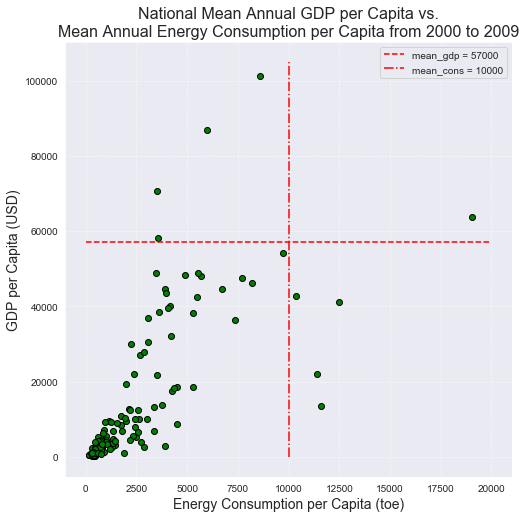

In [34]:
# Scatter plot
plt.figure(figsize = (8,8))
plt.scatter(x = df_energy_gdp['mean_cons'], y = df_energy_gdp['mean_gdp'], c = 'green', edgecolors = 'black')

# Lower bounds of the two variables for the outliers were added after reviewing the initial scatter plot
hline = plt.hlines(y = 57000, xmin = 0, xmax = 20000, colors = 'red', linestyles = '--')
vline = plt.vlines(x = 10000, ymin = 0, ymax = 105000, colors = 'red', linestyles = '-.')

# Titles, axis labels, and legend
plt.title('National Mean Annual GDP per Capita vs.\nMean Annual Energy Consumption per Capita from 2000 to 2009', fontsize = 16)
plt.ylabel('GDP per Capita (USD)', fontsize = 14)
plt.xlabel('Energy Consumption per Capita (toe)', fontsize = 14)
plt.legend(handles = [hline, vline], labels = ['mean_gdp = 57000', 'mean_cons = 10000']);

In [35]:
# Add indicator for outlier to df_energy_gdp
for ind in df_energy_gdp.index:
    if df_energy_gdp.loc[ind, 'mean_cons'] >= 10000 or df_energy_gdp.loc[ind, 'mean_gdp'] >= 57000:
        df_energy_gdp.loc[ind, 'outlier'] = 'yes'
    else:
        df_energy_gdp.loc[ind, 'outlier'] = 'no'

# Create df_energy_gdp_adj for non-outliers
df_energy_gdp_adj = df_energy_gdp.query('outlier == "no"').iloc[:, :-1]

In [36]:
# Save cleaned dataset
df_energy_gdp.to_csv('data/energy_gdp.csv', index = False)
df_energy_gdp_adj.to_csv('data/energy_gdp_adjusted.csv', index = False)

<a id='eda'></a>
<h2>Exploratory Data Analysis</h2>

<h3>CO2 Emissions vs. Oil and Coal Consumption</h3>
    <p>The two datasets, <code>mean_energy_co2.csv</code> and <code>annual_energy_co2.csv</code>, which were created from the <strong>Data Cleaning</strong> section were used for the exploratory data analysis.</p>

In [ ]:
# Load cleaned datasets
df_mean_energy_co2 = pd.read_csv('data/mean_energy_co2.csv')
df_annual_energy_co2 = pd.read_csv('data/annual_energy_co2.csv')

<h4>1. Which five countries show the largest mean yearly consumption of oil and coal from 1995 to 2014?</h4>
    <p>As discovered during the data cleaning process, the five largest consumers of oil and coal from 1995 to 2014 were China, United States, India, Japan, and Russia. Top consumer was China, and the next largest consumer was the United States. The mean annual consumption of oil and coal demonstrated by these two countries is approximately 10 times larger than that of other countries.</p>

In [ ]:
df_mean_energy_co2.iloc[:, :-1]

<h4>2. Which five countries show the largest mean yearly CO2 emissions for the same period [from 1995 to 2014?]</h4>
    <p>Also discovered during the data cleaning process, the five countries which showed the largest mean annual CO2 emissions from 1995 to 2014 were also China, United States, India, Japan, and Russia. Again, the first in rank was China, which was followed by the United States. The mean annual CO2 emissions shown by these two countries is much larger than that of other countries.</p>

In [ ]:
df_mean_energy_co2.iloc[:, np.r_[0,2]].sort_values(by = 'mean_co2_emission', ascending = False)

<h4>3. Does larger yearly consumption of oil and coal necessarily indicate larger yearly emissions of CO2?</h4>
    <p>In case of the countries, China, United States, Japan, India, and Russia, the data from the dataset <code>df_mean_energy_co2</code> which were displayed and reviewed in the first two questions suggest that a country with a relatively large annual consumption of oil and coal would also show relatively large annual CO2 emissions.</p>
    <p>Although the bar plot cited below confirms both this suggestion and the two observations mentioned in the previous questions, this plot also indicates that a country's rank for its annual consumption of oil and coal may not necessarily be the same as the country's rank for its annual CO2 emissions. For example, among the five countries that are presented in the plot, Russia showed the least annual consumption of oil and coal but ranked the third with its annual emissions of CO2.</p>

In [ ]:
# Plot mean annual oil and coal consumption and CO2 emissions for the five major consumers/contributors
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))

x_loc = np.arange(len(df_mean_energy_co2))
width = 0.35
locations = x_loc + width / 2
labels = list(df_mean_energy_co2['country'])

# Bar plot
mean_energy = ax1.bar(x = x_loc, width = width
                      , height = df_mean_energy_co2['mean_energy_consumption']
                      , color = 'blue'
                      , label = 'Mean Oil and Coal Consumption')
ax2 = ax1.twinx() # Create 2nd bar plot for the right y-axis
mean_co2 = ax2.bar(x = x_loc + width, width = width
                   , height = df_mean_energy_co2['mean_co2_emission']
                   , color = 'orange'
                   , label = 'Mean CO2 Emission')

fig.suptitle('Mean Consumption of Oil and Coal, and CO2 Emission\nin Five Countries from 1995 to 2014', fontsize = 16)
plt.xticks(locations, labels)
ax1.set_xlabel('Country', fontsize = 14)
ax1.set_ylabel('Total Oil and Coal Consumption (toe)', fontsize = 14)
ax2.set_ylabel('CO2 Emission (1000 tonnes)', fontsize = 14)
plt.legend(handles = [mean_energy, mean_co2]
           , labels = ['Mean Oil and Coal Consumption', 'Mean CO2 Emission']
           , loc = 'upper right');

<h4>4. How do the yearly trends in the consumption of oil and coal and the emissions of CO2 in these countries explain the answer to the question above?</h4>
    <p>The curves for each country's annual consumption of oil and coal and CO2 emissions from 1995 to 2014 support the three observations discussed in the previous questions.</p>
    <ul>
    <li>As expected, China and the United States' mean annual consumption of oil and coal and CO2 emissions were much larger than those of the other three countries because the curves for China and the United States are significantly above those for the other three countries. Unlike the United States with a relatively steady annual consumption of oil and coal between 1.25 and 1.5 (1e9 toe), China's annual consumption of oil and coal had significantly increased since 2001. In fact, China's annual consumption of oil and coal for 2014 was more than two times larger than that for 2001.</li>
    <li>Russia's mean annual consumption of oil and coal was the least among all five countries because its curve lies at the bottom of the plot.</li>
    <li>Russia's mean annual CO2 emissions, however, was ranked the third among the five countries because its curve lies in between the curves for the other four countries.</li>
    </ul>
    <p>Comparison of the two plots also indicate that from 1995 to 2014, the annual trend in oil and coal consumption and the annual trend in CO2 emissions are similar for each of the five countries. For instance, the curves for the United States, Japan, and Russia are relatively horizontal in both plots. In case of China, the slope of the curves in both plots increased from 2001 to 2013. In case of India, both the annual consumption of oil and coal and the annual CO2 emissions gradually increased from 1995 to 2014. This finding aligns with the notion that conventional sources of energy such as oil and consumption contribute to the emissions of greenhouse gases such as CO2.</p>

In [ ]:
# Plot yearly oil and coal consumption and CO2 emissions data for the five major consumers/contributors
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,10))

# Line plot
for key, group in df_annual_energy_co2.groupby('country'): # Plot for each country at a time
    ax[0] = group.plot(ax = ax[0], x = 'year', y = 'energy_consumption', kind = 'line', label = key) # Plot for oil and coal consumption
    ax[1] = group.plot(ax = ax[1], x = 'year', y = 'co2_emission', kind = 'line', label = key) # Plot for CO2 emissions

# Although the data type for each year is "int", the original xticks were displayed as "float".
xticks = list(np.arange(start = df_annual_energy_co2['year'].min()
                        , stop = int(df_annual_energy_co2['year'].max())+1
                        , step = 2))

fig.suptitle('Annual Trends in Total Energy Consumption and Greenhouse Gas Emission\nof Five Countries from 1995 to 2014', fontsize = 18)

ax[0].set_title('Annual Oil and Coal Consumption', fontsize = 16)
ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Total Oil and Coal Consumption (toe)', fontsize = 14)
ax[0].set_xticks(ticks = xticks)
ax[0].legend(fontsize = 13)

ax[1].set_title('Annual CO2 Emission', fontsize = 16)
ax[1].set_xlabel('Year', fontsize = 14)
ax[1].set_ylabel('CO2 Emission (1000 tonnes)', fontsize = 14)
ax[1].set_xticks(ticks = xticks)
ax[1].legend(fontsize = 13);

<h3>GDP vs. Energy Consumption</h3>
        <p>Both datasets, <code>energy_gdp.csv</code> and <code>energy_gdp_adjusted.csv</code>, which were created from the <strong>Data Cleaning</strong> section were used for the exploratory data analysis.</p>

In [ ]:
# Load cleaned dataset
df_energy_gdp = pd.read_csv('data/energy_gdp.csv')
df_energy_gdp_adj = pd.read_csv('data/energy_gdp_adjusted.csv')

<h4>1. What is the correlation coefficient for the energy consumption and GDP for the data from 2000 to 2009?</h4>
    <p>As briefly mentioned in the <strong>Data Cleaning</strong> section, the scatter plot which is shown in the second block of code below for GDP per capita and energy use per person contained in the dataset <code>df_energy_gdp</code> suggests that the data points indicated in red are outliers. For the dataset which includes these outliers, the correlation coefficient <code>cc</code> for the two variables is 0.720, suggesting a weak positive relationship between the two variables.</p>
    <p>For the dataset <code>df_energy_gdp_adj</code> which excludes the outliers, the correlation coefficient <code>cc_adj</code> for the two variables is 0.855, a 18.8% increase from the correlation coefficient <code>cc</code> for the dataset including the outliers. According to the value of <code>cc_adj</code>, the two variables for the data points excluding the outliers have a strong positive relationship, a characteristic suggested by the green data points presented in the same scatter plot.</p>

In [ ]:
# Correlation coefficient for GDP/capita vs. Energy use, per person
cc = np.corrcoef(df_energy_gdp['mean_cons'], df_energy_gdp['mean_gdp'])[0,1] # including outliers
cc_adj = np.corrcoef(df_energy_gdp_adj['mean_cons'], df_energy_gdp_adj['mean_gdp'])[0,1] # excluding outliers

# % change in correlation coefficient after excluding outliers
delta_cc = (cc_adj - cc)/cc*100
print('{}% change from {} to {}'.format(delta_cc, cc, cc_adj))

In [ ]:
# Plot mean Energy use, per person and mean GDP/capita of each country from 2000 to 2009
plt.figure(figsize = (8,8))

# Scatter plot including outliers
for ind, outlier in zip(df_energy_gdp.index, df_energy_gdp['outlier']):
    if outlier == 'yes': # indicate outliers in red
        plt.scatter(x = df_energy_gdp.loc[ind, 'mean_cons'], y = df_energy_gdp.loc[ind, 'mean_gdp'], c = 'red')
    else: # indicate non-outliers in green
        plt.scatter(x = df_energy_gdp.loc[ind, 'mean_cons'], y = df_energy_gdp.loc[ind, 'mean_gdp'], c = 'green', edgecolors = 'black')

# Horizontal and vertical lines indicating lower bounds for an outlier
hline = plt.hlines(y = 57000, xmin = 0, xmax = 20000, colors = 'red', linestyles = '--', label = 'mean_gdp = 57000')
vline = plt.vlines(x = 10000, ymin = 0, ymax = 105000, colors = 'red', linestyles = '-.', label = 'mean_cons = 10000')

# Title and axis labels
plt.title('National Mean GDP per Capita vs. Mean Energy Use per Person from 2000 to 2009', fontsize = 16)
plt.ylabel('GDP per Capita (USD)', fontsize = 14)
plt.xlabel('Energy Use per Person (toe)', fontsize = 14)
plt.legend(handles = [hline, vline], labels = ['mean_gdp = 57000', 'mean_cons = 10000'])

# Display correlation coefficient
plt.text(x = 14700, y = 94000, s = 'Correlation\nCoefficient: {}'.format(round(cc, 3)), fontsize = 12, bbox = dict(facecolor='red', alpha=0.5));

<h4>2. What are the distributions of the energy consumption data and GDP across countries for the same period?</h4>
    <p>The code block below was used to find the following pieces of information.</p>
    <ol>
    <li>The minimum, 25th percentile, median, 75th percentile, and maximum values of the mean energy use per person.</li>
    <li>The country which each value of the mean energy use per person corresponds to.</li>
    <li>The values of the mean GDP/capita in these five countries.</li>
    </ol>
    <p>According to this analysis, Bangladesh, China, and United Arab Emirates represented the minimum, median, and maximum values of the mean energy use per person data, respectively. The median value 1290.15 toe is approximately eight times the minimum value 161.5 toe, but the maximum value 9744.0 toe is approximately 60 times the minimum value. These values suggest that the distribution of the national mean energy use per person must be right-skewed.</p>

In [ ]:
stat_ls = ['min', '25%', '50%', '75%', 'max'] # Statistics of interest
stat_dict = {} # Store indices and data from df_energy_gdp_adj which correspond to the data for the stats in stat_ls
ind_ls = [] # Store indices of df_energy_gdp_adj which contain the data for the stats in stat_ls

for stat in stat_ls:
    x = df_energy_gdp_adj['mean_cons'].describe()[stat]
    
    # Find df_energy_gdp_adj['mean_cons'] values which correspond to the stats from the statistical summary
    x_temp = min(df_energy_gdp_adj['mean_cons'], key = lambda z: abs(z-x))
    
    # Indices of df_energy_gdp_adj which contain the data retrieved from the statistical summary
    ind = df_energy_gdp_adj.query('mean_cons == @x_temp').index
    ind_ls.append(ind.item())
    
    y = df_energy_gdp_adj.loc[ind, 'mean_gdp'].item() # Mean GDP/capita for this index
    c = df_energy_gdp_adj.loc[ind, 'country'].item() # Country for this index
    
    stat_dict[ind.item()] = ['{} (energy cons.):\n{}'.format(stat, c), (x, y)]

for key in stat_dict:
    print('{} (ind: {})'.format(stat_dict[key][0], key))
    print(' - mean energy consumption: {}'.format(stat_dict[key][1][0]))
    print(' - mean gdp               : {}'.format(stat_dict[key][1][1]))

<p>As previously mentioned, the scatter plot for the dataset which excludes the outliers illustrates a stronger positive correlation between the national mean GDP/capita and mean energy use per person. The improved correlation coefficient value of 0.855 is also displayed in the scatter plot below. According to this observation, countries in this dataset which show high mean energy use per person also show high GDP/capita and vice versa.</p>
<p>Also, the red markers which indicate the data points for the minimum, 25th percentile, median, 75th percentile, and maximum values of mean energy use per person visually demonstrate that the distribution for the national mean energy use per person is right-skewed. In addition, the proximity of data points with each other suggests that the distribution for the national mean GDP/capita is also right-skewed. In other words, large gaps in the economy and in the energy use exist across countries especially between those in the opposite sides of the spectrum. However, the scatter plot alone is insufficient to determine whether the ability to use energy sources is directly influenced by GPD/capita or if GDP/capita is shaped by the energy use per person.</p>

In [ ]:
# Plot mean Energy use, per person and mean GDP/capita of each country from 2000 to 2009
plt.figure(figsize = (8,8))

# Scatter plot excluding outliers
for ind in df_energy_gdp_adj.index:
    
    if ind in ind_ls: # If the mean Energy use per person corresponds to one of the five statistical summaries,
        # then plot the data point with a red colored "X"
        plt.scatter(x = df_energy_gdp_adj.loc[ind, 'mean_cons'], y = df_energy_gdp_adj.loc[ind, 'mean_gdp']
                    , s = 100, marker = 'X', c = 'red', edgecolors = 'black')
        
        # Label each statistical summary
        if ind == ind_ls[1]:
            plt.annotate(s = stat_dict[ind][0]
                         , xy = stat_dict[ind][1], xycoords = 'data'
                         , xytext = (-50, 25), textcoords = 'offset points'
                         , fontstyle = 'italic', fontsize = 12, horizontalalignment = 'center'
                         , arrowprops = dict(arrowstyle = "-"
                                             , connectionstyle = "arc3, rad=0.3"
                                             , color = 'red'))
        elif ind == ind_ls[2]:
            plt.annotate(s = stat_dict[ind][0]
                         , xy = stat_dict[ind][1], xycoords = 'data'
                         , xytext = (-50, 50), textcoords = 'offset points'
                         , fontstyle = 'italic', fontsize = 12, horizontalalignment = 'center'
                         , arrowprops = dict(arrowstyle = "-"
                                             , connectionstyle = "arc3, rad=0.3"
                                             , color = 'red'))
        else:
            plt.annotate(s = stat_dict[ind][0]
                         , xy = stat_dict[ind][1], xycoords = 'data'
                         , xytext = (-70, 0), textcoords = 'offset points'
                         , fontstyle = 'italic', fontsize = 12, horizontalalignment = 'center'
                         , arrowprops = dict(arrowstyle = "-"
                                             , connectionstyle = "arc3, rad=0.3"
                                             , color = 'red'))
            
    else: # If the mean Energy use per person does not correspond to one of the five statistical summaries,
        # then plot the data point with a green colored dot
        plt.scatter(x = df_energy_gdp_adj.loc[ind, 'mean_cons'], y = df_energy_gdp_adj.loc[ind, 'mean_gdp']
                    , s = 25, marker = 'o', c = 'green', edgecolors = 'black')

# Title and axis labels
plt.title('National Mean Annual GDP per Capita vs.\nMean Annual Energy Use per Person from 2000 to 2009', fontsize = 16)
plt.ylabel('GDP per Capita (USD)', fontsize = 14)
plt.xlabel('Energy Use per Person (toe)', fontsize = 14)

# Display correlation coefficient
plt.text(x = 7900, y = 29000, s = 'Correlation\nCoefficient: {}'.format(round(cc_adj, 3)), fontsize = 12, bbox = dict(facecolor='red', alpha=0.5));

<a id='conclusions'></a>
<h2>Conclusions</h2>
    <h3>CO2 Emissions vs. Oil and Coal Consumption</h3>
        <p>From 1995 to 2014, China and the United States showed the largest mean annual consumption of oil and coal and the largest mean annual CO2 emissions. The two countries were followed by Japan, India, and Russia although the annual consumption of oil and coal and the annual CO2 emissions in China and the United States were significantly larger than those in the other three countries. The data for these five countries suggested that the annual trends in consumption of oil and coal and CO2 emissions align with each other, confirming the notion that conventional sources of energy contribute the emissions of greenhouse gases.</p>
        <p>Despite the positive correlation between the consumption of oil and coal and the emissions of CO2, a country with a higher consumption of oil and coal than another country may have lower CO2 emissions than the other country, a characteristic shown in Japan and Russia. The bar and line plots presented in the previous section are insufficient to fully account for this observation.</p>
    <h3>GDP vs. Energy Consumption</h3>
        <p>The national mean GDP/capita and mean energy use per person from 2000 to 2009 showed a strong positive relationship with a correlation coefficient of 0.855. Thus, countries observed in this dataset that show high mean energy use per person also show high GDP/capita and vice versa.</p>
        <p>In addition, according to the scatter plot, the distributions for the mean energy use per person and the mean GDP/capita were right-skewed. The plot illustrated the existence of large gaps in the economy and in the energy use across countries especially between those in the opposite sides of the spectrum. However, the data analysis covered in the previous section did not go further to investigate whether a country's GPD/capita dictates its ability to capitalize on various energy sources or if the energy use per person shapes the country's GDP/capita.</p>